# Embedding Matplotlib Animations in IPython Notebooks

## Imports

In [1]:
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
from jmutility import phantom_ball, slicing

## Animation Display Function
First, change backend

In [2]:
%matplotlib inline
# plt.switch_backend('qt4agg')
print plt.get_backend()

In [3]:
# Create a function that will save an animation and embed it in an html 
# string. Note that this will require ffmpeg or mencoder to be installed
# on your system.
 
from tempfile import NamedTemporaryFile

VIDEO_TAG = """<video controls>
 <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
 Your browser does not support the video tag.
</video>"""

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.mp4') as f:
            anim.save(f.name, fps=20, extra_args=['-vcodec', 'libx264'])
            video = open(f.name, "rb").read()
        anim._encoded_video = video.encode("base64")
    
    return VIDEO_TAG.format(anim._encoded_video)


# use IPython's HTML display tools to create a function which will show the 
# video inline:

from IPython.display import HTML

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim))

Example of Embedding an Animation

In [4]:
vol = phantom_ball((30, 40, 50), 0.5)

In [5]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes()
cm = plt.get_cmap('Greys')
im = ax.imshow(vol[:, :, 5], cmap=cm)

In [6]:
def updatefig(nn):
    """Animation function.  This function is called sequentially by animation.FuncAnimation."""    
    plt.hold(True)
    im = ax.imshow(np.squeeze(vol[:, :, np.mod(nn, vol.shape[2])]), cmap=cm)
    return im,

In [7]:
# Call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, updatefig, interval=100, blit=True)
display_animation(anim)

<source src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQAAT6htZGF0AAACrgYF//+q
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE0MiByMjQ5MSAyNGU0ZmVkIC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAxNCAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD00IHRocmVhZHM9MTIg
bG9va2FoZWFkX3RocmVhZHM9MiBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRl
cmxhY2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJf
cHlyYW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9
MCB3ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTIwIHNjZW5lY3V0PTQwIGludHJhX3Jl
ZnJlc2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAu
NjAgcXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAAH
SmWIhAA///73I/wKbWkON0//3P+NW65VqSAyPgAAAwAAq+dAAAGfgDs6bAdOMQC2DIK0uBwSCL3l
0Me8OiPGPIJDbLZlR5+PmX1P/941/8/9tUKHpMJ+nmuqBzIvTxvovbN/v4/nt8Z+FP7xe0mw6NHz
C37yVx8gb6y10idk95gMkq2V+bey+5YXvWDlmzoC8wD5iMugenCKOUeT85oPrdI7t5A6wytgAHFB
+VudiOboKZDf6IY2wpO4thMBImoDSGuvBYP/djQrszHslz69D3NnIKiuza7QAANAAk/yoatZG9E+
hz6qC2w1Wc9XPxO7+QDZ0XqXcfYaCqPV2QTBiJKWVwJfhcvOlFKvEWHtMA8rJ4wf+wjTD+XdVjuO
bWdy04QAClDFeE3fxZRPnJ6iMhyMZKk/0gyAdrj9+YlKL9yAv7en6+wsldg32ZbiI79jaUiqSbGg
8BufTq8NG/b8bZB1jR9zmqysZmOnXyzM11ue2ujnT8beh3GrleRvz+iwJ4gtSRxruLxzuv/hmEV4
obpZDNcd8n38jhyL9gx9TWkxVC0XDygEvVcAPpMy02A9vCweBHblfS6K5MGHT41+9qELD/IicJYS
PA54TeiqZ5YY6mARGvYlYeXlAuTsoDi9j+uzXi67l8sgEBSyEeHFNlxFtoSYi0O6p4ACW8VkuaUL
l4/ZauU64Jjp5u3VWjf4vUypYYN1U3ONIbKEHFIhUJbK3Uy+ffGkGy/5cmMWOXwA3WbNKn5wDh09
PhMNivLL8cv+4tXjlAhTTxuqSnehh01n9lBW2B6V+Ai9A+McbyzgK5v6FPT20op9zoYqHDQIArAL
gQsHIOwHyjoPXI6r7lR8hlCsrMyk3eXUdWCApmmFt6SePwPLgRdZP0mXk4iS+WKHdh7GL+b6fHOh
9StFsb/JaLjam3cFaNE0r8cY7mLdg/dQ78NHBjbHbsYcQUVrJtJ5eOYLaIawGRE7aL//wagJeqJV
jKkTtltdSIrpA++zhTqCUF0XCY0vhB50tMNlXselP7dph9zBawEyCwHuGYTQT2zZPgujkdFcP4UA
KMmojdJOcgvBL1S5ZRLA/np/VSADechV6/NzAryZQpjUsEtLs+A2n8u4aSLodHzBxmtG8YSYSnFk
7NT6yI748b2sT5d5qEXx4i4LihYbb5Fn9qAX8DUxKMDY+WHPRKFlH/+EppeGjVX0hIED3nYeRwHY
1BilDKKbAgGb0ahH5XN//iO4m+oe8oSMKE8jexS1gOcMIvgwzkDzx71Iv+b/zF4aG9kMkbWgZi2Z
b99s0+5e6hm9KoNsBLS0zgTD5rl0Fqkypy1PN7wic1SamFvVGZFktM+6IcEMZi1h2A2hILXHiOCs
eKwe2rx3RNf0NKsPpI5x7wtIg4BdvsujS0afjxt8+FIxlGBWsd5+7Am//aimGUntxHsrMeFccF0e
4tZQgPB3KLAd/AbU6PCR8DwtxJ4X3Uop82XC0flTam+AzwzD1ELdDM7hwsQg2cCrj//6vVv1pcki
SIIYtsScUM7v7l/7bhzWPW3eN3yKuMM9n8Uv2WlRRG9EjGSePdp7QWGT3N4RDDuME5g49sUyxq7U
dA9FDL0/WZn9AFVvS5TFPWHF8A9AcL0qmBz3acu3d29IOn8plc3j8wQU03jT8TJMXbtkXgOrWm5r
lDNCbsCZY6Rz2lCc7OJ7SuKxAAAGmVLxbPKkEGuwTEoOlI4ST4QnO4FgHO2zrzqiuk/d8SIpgBRx
b/y8c/T9x3FHynnfM5LhgTOvzn4hi+hHipqdtdrEJvMrQJ1DPWjj1hDEVZmcaJNr7EN4nZWeanqF
WSlaAXzhOEAYWB7m8OSJGU70sDPHaCDPn1+1DxC/Yj1zlBOJxKfyhQzbCmvdEKC2Eqf8LrpAw97P
iVQCzdSuFBcGpaCj4HX0SA80h6asX6PMa9lVKQ/XNEtVxxT++vzhmYHebXDu4rMcBpM0gFZeMupm
5H///4gRT6mOHSGywr35AVjcfc58ltnSAdtkJYbsJBt2YEkAy8xQJ7sBojB+0SjfGW7rrY5llbVL
7jcvcEUG4Z6aTr25WXEilsFx71dNHMGUCAJ8mxjqfnTi2ez/4bjLmL8k8sdxUQHvBytHjzRC/Tc6
QmR3scIJBP1PCnKALL6nB47qIkqCwv0oK4wxvf3IpEgCGJkUlK6YT/ex+MtFmdrRwwlwjxtd5fED
ExgzV61Kwip+07FWQxkY/EYfFGTapO2AqaMiYwKORWUfB2O9iendVTM46qsCnPfzPuoqZa7gP7LQ
zYvmSPEdBPFeUdt5lLPpcQzAf9iHzlf4O3CloRBkOM5gIjbSKHWx60Qq1ZUg+fWQDvoMQroQuhBd
9oa0Hw+h6qdCj4fzl+bJ3uS/VYsfQtWRz5B5aZSkwSQ56Aeth3fcvye7SqJd2MGr0I/6JbmdIdW8
csuYI6ex0OOugSUWtfzvInmCgNiZQSEfRtgLsPfOVyUxqppRYAAAAwAF7QAAA+dBmiRsQ7/+qZYA
AAVwaggAx+zx6RPz//Vv0gGgW7Xc8l/+4LsKDFGGUdQeVyDz/BC7sbkxVG7vkm5X8oQOrnl5CXYY
GSijgvYWVeS8juytDN8v8m8lSR0RsSbL/WemrX7k6MsBySiuXCi+7kUnuor7gj4qXyI+KqRAP10S
1R3F/FHzY3I8FLETwryKuBdT7kJY6QkJuHasoJTzf73Jf3FTmtksHWusyAVTf9VhZR+z5T4rImLV
iqwl7tVUfrIdWoIozL+WDU4pSgfI1oMbIm/3jXJOjULdlJC+DtPDjjzRH3iAb6pm7cmHF72bfPHv
E2JPoL9i3qKcecPDJAXEmntve0Ghfn2Qup39siKfPM2G9F4IzfzS9PAHiBSWAS+lrEO48sdSUA/R
gUtU6+A1RRFq7qNlQEfuE9Pltg1NfNp1zCPZ

<source src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQAACf5tZGF0AAACrgYF//+q
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE0MiByMjQ5MSAyNGU0ZmVkIC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAxNCAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD00IHRocmVhZHM9MTIg
bG9va2FoZWFkX3RocmVhZHM9MiBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRl
cmxhY2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJf
cHlyYW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9
MCB3ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTIwIHNjZW5lY3V0PTQwIGludHJhX3Jl
ZnJlc2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAu
NjAgcXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAAA
PGWIhAA///73I/wKbWkON0//3P+NW65VqSAyPgAAClPYADhQm04OIwAAAwAAAwAAAwAAAwAAAwAA
AwAB/QAAAA9BmiRsQ//+qZYAAAMA8IAAAAAMQZ5CeIZ/AAADANSBAAAACwGeYXRCvwAAAwGLAAAA
CwGeY2pCvwAAAwGLAAAAFUGaaEmoQWiZTAh///6plgAAAwDwgQAAAA5BnoZFESwz/wAAAwDUgQAA
AAsBnqV0Qr8AAAMBiwAAAAsBnqdqQr8AAAMBiwAAABVBmqxJqEFsmUwIf//+qZYAAAMA8IAAAAAO
QZ7KRRUsM/8AAAMA1IEAAAALAZ7pdEK/AAADAYsAAAALAZ7rakK/AAADAYsAAAAVQZrwSahBbJlM
CH///qmWAAADAPCBAAAADkGfDkUVLDP/AAADANSBAAAACwGfLXRCvwAAAwGLAAAACwGfL2pCvwAA
AwGLAAAAFUGbNEmoQWyZTAh///6plgAAAwDwgAAAAA5Bn1JFFSwz/wAAAwDUgQAAAAsBn3F0Qr8A
AAMBiwAAAAsBn3NqQr8AAAMBiwAAABVBm3hJqEFsmUwIf//+qZYAAAMA8IEAAAAOQZ+WRRUsM/8A
AAMA1IAAAAALAZ+1dEK/AAADAYsAAAALAZ+3akK/AAADAYsAAAAVQZu8SahBbJlMCH///qmWAAAD
APCAAAAADkGf2kUVLDP/AAADANSBAAAACwGf+XRCvwAAAwGLAAAACwGf+2pCvwAAAwGLAAAAFUGb
4EmoQWyZTAh///6plgAAAwDwgQAAAA5Bnh5FFSwz/wAAAwDUgAAAAAsBnj10Qr8AAAMBiwAAAAsB
nj9qQr8AAAMBiwAAABVBmiRJqEFsmUwIf//+qZYAAAMA8IAAAAAOQZ5CRRUsM/8AAAMA1IEAAAAL
AZ5hdEK/AAADAYsAAAALAZ5jakK/AAADAYsAAAAVQZpoSahBbJlMCH///qmWAAADAPCBAAAADkGe
hkUVLDP/AAADANSBAAAACwGepXRCvwAAAwGLAAAACwGep2pCvwAAAwGLAAAAFUGarEmoQWyZTAh/
//6plgAAAwDwgAAAAA5BnspFFSwz/wAAAwDUgQAAAAsBnul0Qr8AAAMBiwAAAAsBnutqQr8AAAMB
iwAAABVBmvBJqEFsmUwIf//+qZYAAAMA8IEAAAAOQZ8ORRUsM/8AAAMA1IEAAAALAZ8tdEK/AAAD
AYsAAAALAZ8vakK/AAADAYsAAAAVQZs0SahBbJlMCH///qmWAAADAPCAAAAADkGfUkUVLDP/AAAD
ANSBAAAACwGfcXRCvwAAAwGLAAAACwGfc2pCvwAAAwGLAAAAFUGbeEmoQWyZTAh///6plgAAAwDw
gQAAAA5Bn5ZFFSwz/wAAAwDUgAAAAAsBn7V0Qr8AAAMBiwAAAAsBn7dqQr8AAAMBiwAAABVBm7xJ
qEFsmUwIf//+qZYAAAMA8IAAAAAOQZ/aRRUsM/8AAAMA1IEAAAALAZ/5dEK/AAADAYsAAAALAZ/7
akK/AAADAYsAAAAVQZvgSahBbJlMCH///qmWAAADAPCBAAAADkGeHkUVLDP/AAADANSAAAAACwGe
PXRCvwAAAwGLAAAACwGeP2pCvwAAAwGLAAAAFUGaJEmoQWyZTAh///6plgAAAwDwgAAAAA5BnkJF
FSwz/wAAAwDUgQAAAAsBnmF0Qr8AAAMBiwAAAAsBnmNqQr8AAAMBiwAAABVBmmhJqEFsmUwIf//+
qZYAAAMA8IEAAAAOQZ6GRRUsM/8AAAMA1IEAAAALAZ6ldEK/AAADAYsAAAALAZ6nakK/AAADAYsA
AAAVQZqsSahBbJlMCH///qmWAAADAPCAAAAADkGeykUVLDP/AAADANSBAAAACwGe6XRCvwAAAwGL
AAAACwGe62pCvwAAAwGLAAAAFUGa8EmoQWyZTAh///6plgAAAwDwgQAAAA5Bnw5FFSwz/wAAAwDU
gQAAAAsBny10Qr8AAAMBiwAAAAsBny9qQr8AAAMBiwAAABVBmzRJqEFsmUwIf//+qZYAAAMA8IAA
AAAOQZ9SRRUsM/8AAAMA1IEAAAALAZ9xdEK/AAADAYsAAAALAZ9zakK/AAADAYsAAAAVQZt4SahB
bJlMCHf//qmWAAADAPCBAAAADkGflkUVLDP/AAADANSAAAAACwGftXRCvwAAAwGLAAAACwGft2pC
vwAAAwGLAAAAFUGbvEmoQWyZTAh3//6plgAAAwDwgAAAAA5Bn9pFFSwz/wAAAwDUgQAAAAsBn/l0
Qr8AAAMBiwAAAAsBn/tqQr8AAAMBiwAAABRBm+BJqEFsmUwIb//+p4QAAAMB3QAAAA5Bnh5FFSwz
/wAAAwDUgAAAAAsBnj10Qr8AAAMBiwAAAAsBnj9qQr8AAAMBiwAAABNBmiNJqEFsmUwIV//+OEAA
ABxwAAAAC0GeQkIV/wAAAwGLAAAACwGeYWkQrwAAAwGLAAAHwW1vb3YAAABsbXZoZAAAAAAAAAAA
AAAAAAAAA+gAABOIAAEAAAEAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAQAAAAAAAAAAAAAA
AAAAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAAAbrdHJhawAAAFx0a2hkAAAAAwAA
AAAAAAAAAAAAAQAAAAAAABOIAAAAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAQAAAAAA
AAAAAAAAAAAAQAAAAAGwAAABIAAAAAAAJGVkdHMAAAAcZWxzdAAAAAAAAAABAAATiAAABAAAAQAA
AAAGY21kaWEAAAAgbWRoZAAAAAAAAAAAAAAAAAAAKAAAAMgAVcQAAAAAAC1oZGxyAAAAAAAAAAB2
aWRlAAAAAAAAAAAAAAAAVmlkZW9IYW5kbGVy

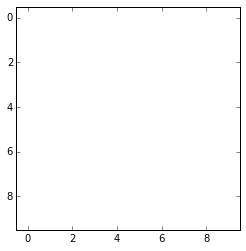

In [10]:
animation.Animation._repr_html_ = anim_to_html
animation.FuncAnimation(fig, updatefig, frames=100, interval=100, blit=True)

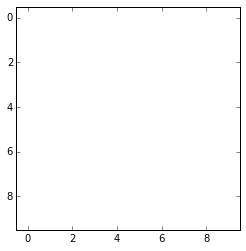

In [9]:
slicing(vol)

Test LaTeX
inline $\lambda\tau A^T$
displayed math: $$\int_0^\infty dx$$

#Markdown 

# # Heading
## ##Section heading
### ###and so on

bold: **embrace with asterisks**

underscore: __embrace with underscoress__

## Links 

Create simple links by wrapping square brackets around the link text and round brackets around the URL:
[LINK_NAME](http://link.com)
[Nesta CMS](http://effectif.com/nesta "Nesta is a superb CMS")

##Bullets

* Use asterisk followed by a space
* Second
    * Nested
      * Nested
* a

##Numbered list

1. Use number, period, space
2. Two
3. Three

#Quotes
> User greater than character > by 

This uses HTML's blockquote <blockquote/> tag